In [669]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import calendar 
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [759]:
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [760]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second

In [761]:
def badToRight(month):
    if month in [12,1,2]:
        return 4
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3

#apply() 내장함수는 split(),map(),join(),filter()등 과 함꼐 필수적으로 숙지해야 할 함수이다.
train['season'] = train.month.apply(badToRight)

In [762]:
train["dayofweek"] = train["datetime"].dt.dayofweek

In [763]:
#우리가 가진 column들 중 값들이 일정하고 정해져있다면 category로 변경해주고
#필요하지 않은 column들은 이제 버린다.
categorizational_columns = ['holiday','season','weather','workingday','year','month','day','hour','dayofweek']
drop_columns = ['datetime','casual','registered','count','minute','second']

In [764]:
#categorical하게 변환
for col in categorizational_columns:
    train[col] = train[col].astype('category')

In [765]:
train.dayofweek = train.dayofweek.astype('category')
train.dayofweek.cat.categories = ['5','1','6','0','4','2','3']

### 데이터 분리 및 변수재정의

In [766]:
test = train.loc[ (train["year"] == 2012) & (train["month"].isin([9,10,11,12]) ) ]
#vali = train.loc[ (train["year"] == 2012) & (train["month"].isin([7,8]) ) ]
#train = train.loc[ ((train["year"] == 2012) & (train["month"].isin([1,2,3,4,5,6]))) | (train["year"] == 2011)]
train = train.loc[ ((train["year"] == 2012) & (train["month"].isin([1,2,3,4,5,6,7,8]))) | (train["year"] == 2011)]


In [767]:
from sklearn.ensemble import RandomForestRegressor

#Windspeed가 0인 데이터프레임
windspeed_0 = train[train.windspeed == 0]
#Windspeed가 0이 아닌 데이터프레임
windspeed_Not0 = train[train.windspeed != 0]

#Windspeed가 0인 데이터 프레임에 투입을 원치 않는 컬럼을 배제
windspeed_0_df = windspeed_0.drop(['windspeed','casual','registered','count','datetime'],axis=1)

#Windspeed가 0이 아닌 데이터 프레임은 위와 동일한 데이터프레임을 형성하고 학습시킬 Windspeed Series를 그대로 둠
windspeed_Not0_df = windspeed_Not0.drop(['windspeed','casual','registered','count','datetime'],axis=1)
windspeed_Not0_series = windspeed_Not0['windspeed'] 

#모델에 0이 아닌 데이터프레임과 결과값을 학습
rf = RandomForestRegressor()
rf.fit(windspeed_Not0_df,windspeed_Not0_series)
#학습된 모델에 Windspeed가 0인 데이터프레임의 Windspeed를 도출
predicted_windspeed_0 = rf.predict(windspeed_0_df)
#도출된 값을 원래의 데이터프레임에 삽입
windspeed_0['windspeed'] = predicted_windspeed_0

In [768]:
#나눈 데이터 프레임을 원래의 형태로 복원
train = pd.concat([windspeed_0,windspeed_Not0],axis=0)

In [769]:
#시간별 정렬을 위해 string type의 datetime을 datetime으로 변환
train.datetime = pd.to_datetime(train.datetime,errors='coerce')

In [770]:
#합쳐진 데이터를 datetime순으로 정렬
train = train.sort_values(by=['datetime'])

In [682]:
from sklearn.ensemble import RandomForestRegressor

#Windspeed가 0인 데이터프레임
windspeed_0 = vali[vali.windspeed == 0]
#Windspeed가 0이 아닌 데이터프레임
windspeed_Not0 = vali[vali.windspeed != 0]

#Windspeed가 0인 데이터 프레임에 투입을 원치 않는 컬럼을 배제
windspeed_0_df = windspeed_0.drop(['windspeed','casual','registered','count','datetime'],axis=1)

#Windspeed가 0이 아닌 데이터 프레임은 위와 동일한 데이터프레임을 형성하고 학습시킬 Windspeed Series를 그대로 둠
windspeed_Not0_df = windspeed_Not0.drop(['windspeed','casual','registered','count','datetime'],axis=1)
windspeed_Not0_series = windspeed_Not0['windspeed'] 

#모델에 0이 아닌 데이터프레임과 결과값을 학습
rf = RandomForestRegressor()
rf.fit(windspeed_Not0_df,windspeed_Not0_series)
#학습된 모델에 Windspeed가 0인 데이터프레임의 Windspeed를 도출
predicted_windspeed_0 = rf.predict(windspeed_0_df)
#도출된 값을 원래의 데이터프레임에 삽입
windspeed_0['windspeed'] = predicted_windspeed_0

In [683]:
#나눈 데이터 프레임을 원래의 형태로 복원
vali = pd.concat([windspeed_0,windspeed_Not0],axis=0)

In [684]:
#시간별 정렬을 위해 string type의 datetime을 datetime으로 변환
vali.datetime = pd.to_datetime(vali.datetime,errors='coerce')

In [685]:
#합쳐진 데이터를 datetime순으로 정렬
vali = vali.sort_values(by=['datetime'])

In [771]:
from sklearn.ensemble import RandomForestRegressor

#Windspeed가 0인 데이터프레임
windspeed_0 = test[test.windspeed == 0]
#Windspeed가 0이 아닌 데이터프레임
windspeed_Not0 = test[test.windspeed != 0]

#Windspeed가 0인 데이터 프레임에 투입을 원치 않는 컬럼을 배제
windspeed_0_df = windspeed_0.drop(['windspeed','casual','registered','count','datetime'],axis=1)

#Windspeed가 0이 아닌 데이터 프레임은 위와 동일한 데이터프레임을 형성하고 학습시킬 Windspeed Series를 그대로 둠
windspeed_Not0_df = windspeed_Not0.drop(['windspeed','casual','registered','count','datetime'],axis=1)
windspeed_Not0_series = windspeed_Not0['windspeed'] 

#모델에 0이 아닌 데이터프레임과 결과값을 학습
rf = RandomForestRegressor()
rf.fit(windspeed_Not0_df,windspeed_Not0_series)
#학습된 모델에 Windspeed가 0인 데이터프레임의 Windspeed를 도출
predicted_windspeed_0 = rf.predict(windspeed_0_df)
#도출된 값을 원래의 데이터프레임에 삽입
windspeed_0['windspeed'] = predicted_windspeed_0

In [772]:
#나눈 데이터 프레임을 원래의 형태로 복원
test = pd.concat([windspeed_0,windspeed_Not0],axis=0)

In [773]:
#시간별 정렬을 위해 string type의 datetime을 datetime으로 변환
test.datetime = pd.to_datetime(test.datetime,errors='coerce')

In [774]:
#합쳐진 데이터를 datetime순으로 정렬
test = test.sort_values(by=['datetime'])

### 모델링

In [775]:
# y is predict value y_ is actual value
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y), 
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [776]:
#데이터 훈련시 집어 넣게 될 각각의 결과 값들
#datetimecol = test['datetime']
yLabels = train['count'] #count
#yLabelsRegistered = train['registered'] #등록된 사용자
#yLabelsCasual = train['casual'] #임시 사용자
#yLabels_vali = vali['count']
yLabels_test = test['count'] #y값

In [777]:
yLabelslog = np.log1p(yLabels)
#yLabelslog_vali = np.log1p(yLabels_vali)
yLabelslog_test = np.log1p(yLabels_test)

In [778]:
#필요 없는 column들을 버린 후의 훈련과 테스트 셋
train = train.drop(drop_columns,axis=1)
#vali = vali.drop(drop_columns,axis=1)
test = test.drop(drop_columns,axis=1)

In [668]:
def bad(dayofweek):
    if dayofweek in [3]:
        return 1
    else return 0

#apply() 내장함수는 split(),map(),join(),filter()등 과 함꼐 필수적으로 숙지해야 할 함수이다.
#train['season'] = train.month.apply(badToRight)

SyntaxError: invalid syntax (<ipython-input-668-678608340151>, line 4)

In [ ]:
train.dayofweek.apply(bad)

In [694]:

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso


rf = RandomForestRegressor()

#Ridge모델은 L2제약을 가지는 선형회귀모델에서 개선된 모델이며 해당 모델에서 유의 깊게 튜닝해야하는 파라미터는 alpha값이다.
ridge = Ridge()

#우리가 튜닝하고자하는 Ridge의 파라미터 중 특정 파라미터에 배열 값으로 넘겨주게 되면 테스트 후 어떤 파라미터가 최적의 값인지 알려줌 
ridge_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
rmsle_scorer = metrics.make_scorer(rmsle,greater_is_better=False)
grid_ridge = GridSearchCV(ridge,ridge_params,scoring=rmsle_scorer,cv=5)


rmsle_scorer = metrics.make_scorer(rmsle,greater_is_better=False)
grid_ridge = GridSearchCV(ridge,ridge_params,scoring=rmsle_scorer,cv=5)

rf_params = {'n_estimators':[1,10,100]}
grid_rf = GridSearchCV(rf,rf_params,scoring=rmsle_scorer,cv=5)
grid_rf.fit(train,yLabelslog)
preds2_1 = grid_rf.predict(vali)
#preds2_2 = grid_rf.predict(test)

print('RMSLE Value for RandomForest {}'.format(rmsle(np.exp(yLabelslog_vali),np.exp(preds2_1),False)))
#print('RMSLE Value for RandomForest {}'.format(rmsle(np.exp(yLabelslog_test),np.exp(preds2_2),False)))

RMSLE Value for RandomForest 0.28994909177010086


# 잠시 쉬어가자;;

In [561]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_params={'max_depth':range(1,15,1),'n_estimators':[1,10,100]}
grid_gb=GridSearchCV(gb,gb_params,scoring=rmsle_scorer,cv=10)
grid_gb.fit(train,yLabelslog)
preds3 = grid_gb.predict(test)
print('RMSLE Value for GradientBoosting {}'.format(rmsle(np.exp(yLabelslog_test),np.exp(preds3),False)))

RMSLE Value for GradientBoosting 0.33426527080861235


In [779]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_params={'max_depth':range(1,15,1),'n_estimators':[1,10,100]}
grid_gb=GridSearchCV(gb,gb_params,scoring=rmsle_scorer,cv=10)
grid_gb.fit(train,yLabelslog)
preds3 = grid_gb.predict(test)
print('RMSLE Value for GradientBoosting {}'.format(rmsle(np.exp(yLabelslog_test),np.exp(preds3),False)))

RMSLE Value for GradientBoosting 0.3293438432636889


In [1041]:
test['count'] = np.exp(yLabelslog_test)
test["pred"] = np.exp(preds3)

In [1043]:
rmsle(np.exp(yLabelslog_test),test["pred"])

('RMSLE', 0.3246338839603068, False)

In [1042]:
z1 = test.loc[test["hour"].isin([0,1,2,3,4,5,6,7,8,9]),]
z1
test.loc[test.index.isin(z1.loc[z1["pred"]>=100].index),"pred"] = test.loc[test.index.isin(z1.loc[z1["pred"]>=100].index),"pred"] * 1.2

In [1039]:
test.loc[test.index.isin(z1.loc[z1["dayofweek"]=="3"].index),"pred"] = test.loc[test.index.isin(z1.loc[z1["dayofweek"]=="3"].index),"pred"] *0.9

In [890]:
test.loc[test.index.isin(z1.loc[z1["count"]>=100].index),"pred"] = test.loc[test.index.isin(z1.loc[z1["count"]>=100].index),"pred"] * 0.9

In [880]:
test.loc[test.index.isin(z1.loc[z1["count"]>=12].index),"pred"] = test.loc[test.index.isin(z1.loc[z1["month"]==12].index),"pred"]*0.9

In [879]:
test.loc[test.index.isin(z1.loc[z1["month"]==12].index),"pred"]*0.9

10454     86.009596
10455     72.398530
10456     43.332149
10457     21.972839
10458      7.156909
            ...    
10809    152.557138
10810    127.125376
10811     76.791806
10812     79.618805
10813     46.825894
Name: pred, Length: 72, dtype: float64

In [850]:
test.loc[test["dayofweek"]=="3" & test["month"]==12,"pred"] = test.loc[test["dayofweek"]=="3"& test["month"]==12,"pred"]*0.9

TypeError: cannot compare a dtyped [category] array with a scalar of type [bool]

In [841]:
rmsle(test.loc[test["dayofweek"]=="3","count"],test.loc[test["dayofweek"]=="3","pred"])

('RMSLE', 0.352057150250441, False)

In [ ]:
rmsle(test.loc[test["dayofweek"]=="3","count"],test.loc[test["dayofweek"]=="3","pred"])

In [780]:
preds3

array([5.09275782, 4.77518305, 4.22304307, ..., 5.07487451, 4.87884032,
       4.42706817])

In [599]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression

#for random forest regresion.
no_of_test=[2000]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(train,yLabels)
pred=clf_rf.predict(test)
print((np.sqrt(mean_squared_log_error(pred,yLabels_test))))

0.36390284827217073


In [819]:
# self-defined eval metric
# f(y_true: array, y_pred: array) -> name: string, eval_result: float, is_higher_better: bool
# Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_true, y_pred):
    return 'RMSLE', np.sqrt(np.mean(np.power(np.log1p(y_pred) - np.log1p(y_true), 2))), False

In [ ]:
# train
gbm = lgb.LGBMRegressor(num_leaves=50,
                        learning_rate=0.05,
                        n_estimators=50)
gbm.fit(train, yLabels,
        eval_set=[(vali, yLabels_vali)],
        eval_metric=rmsle,
        early_stopping_rounds=5)

In [482]:
print('RMSLE Value for RandomForest {}'.format(rmsle(yLabels_test,gbm.predict(test)),False))

RMSLE Value for RandomForest ('RMSLE', 0.7659769728811671, False)


In [695]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [696]:
model_lgb.fit(train, yLabelslog)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(vali))

lgb_train_pred = np.exp(model_lgb.predict(train))
lgb_vali_pred = np.exp(model_lgb.predict(vali))

print(rmsle(yLabelslog_vali,model_lgb.predict(vali)))
#print(rmsle(yLabelslog_test,model_lgb.predict(test)))


0.39427523773819845


In [521]:
rf = RandomForestRegressor()

rf_params = {'n_estimators':[1,10,100]}
grid_rf = GridSearchCV(rf,rf_params,scoring=rmsle_scorer,cv=5)
grid_rf.fit(train,yLabelslog)
preds = grid_rf.predict(test)
print('RMSLE Value for RandomForest {}'.format(rmsle(np.exp(yLabelslog_test),np.exp(preds),False)))

RMSLE Value for RandomForest 0.4076034140631483


In [697]:
import shap
import js2py

In [698]:
# load JS visualization code to notebook
shap.initjs()

In [699]:
explainer = shap.TreeExplainer(model_lgb)

In [700]:
shap_values = explainer.shap_values(vali)

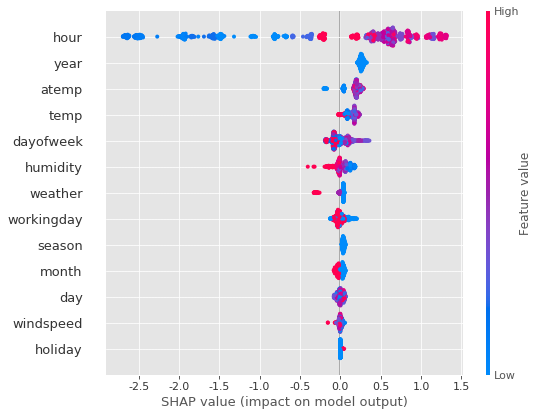

In [420]:
# summarize the effects of all the features
shap.summary_plot(shap_values, vali)

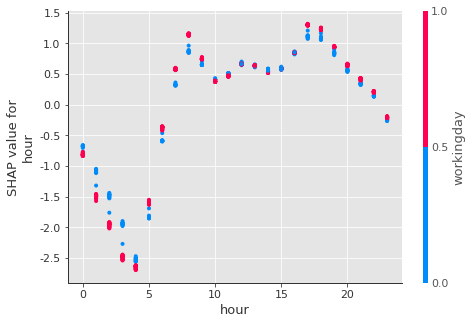

In [421]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("hour", shap_values, vali)

In [386]:
vali_1 = vali

In [387]:
vali_1["count"] = yLabels_vali
vali_1["gbm_count"] = lgb_vali_pred
vali_1["gbm_diff"] = (np.log(vali_1["count"]+1) - np.log(vali_1["gbm_count"]+1)) **2

In [390]:
from pandas import Series, DataFrame
gbm_bottom = DataFrame(vali_1).sort_values(by="gbm_diff",ascending=False).head(20)
gbm_top = DataFrame(vali_1).sort_values(by="gbm_diff",ascending=True).head(20)

In [391]:
gbm_bottom

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek,count,gbm_count,gbm_diff
8493,2,0,0,1,27.88,31.820,83,8.99810,2012,7,15,6,3,15,89.430063,2.999783
8709,2,0,0,1,29.52,34.850,79,16.99790,2012,8,5,6,3,19,105.033392,2.782297
8325,2,0,0,1,31.98,38.635,70,8.99810,2012,7,8,6,3,21,100.816883,2.347433
8494,2,0,0,1,28.70,33.335,79,6.00320,2012,7,15,7,3,47,218.325790,2.308446
8158,2,0,0,1,30.34,34.850,70,8.70062,2012,7,1,7,3,50,224.914468,2.215129
8326,2,0,0,1,32.80,40.150,66,8.10097,2012,7,8,7,3,52,231.737979,2.189279
8878,2,0,0,1,26.24,30.305,65,8.99810,2012,8,12,7,3,39,173.327319,2.166947
9046,2,0,0,2,25.42,30.305,69,8.99810,2012,8,19,7,3,41,179.699176,2.129160
8324,2,0,0,1,31.98,37.120,62,8.70062,2012,7,8,5,3,6,28.776050,2.096108
8877,2,0,0,1,26.24,30.305,65,11.00140,2012,8,12,6,3,16,70.631663,2.068776


In [758]:
gbm_top.loc[gbm_top.dayofweek=="3"]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek,count,gbm_count,gbm_diff
8165,2,0,0,1,37.72,41.665,33,16.9979,2012,7,1,14,3,444,444.190506,1.831944e-07
8330,2,0,0,1,37.72,44.695,42,19.9995,2012,7,8,11,3,389,392.357254,7.347068e-05
8706,2,0,0,1,29.52,34.850,74,16.9979,2012,8,5,3,3,41,40.601198,9.102395e-05


In [392]:
gbm_top

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek,count,gbm_count,gbm_diff
8577,2,0,1,2,31.16,35.605,62,8.99810,2012,7,18,18,6,643,643.045255,4.937864e-09
8165,2,0,0,1,37.72,41.665,33,16.99790,2012,7,1,14,3,444,444.190506,1.831944e-07
8557,2,0,1,1,32.80,37.880,55,15.00130,2012,7,17,22,1,244,243.882738,2.291887e-07
8763,2,0,1,2,32.80,37.880,55,8.99810,2012,8,7,12,1,283,282.840207,3.167563e-07
8260,2,0,1,1,37.72,41.665,33,15.00130,2012,7,5,13,0,310,310.708680,5.180723e-06
8446,2,0,1,2,28.70,32.575,54,10.00176,2012,7,13,7,4,380,378.906045,8.267940e-06
8293,2,0,1,1,32.80,37.880,55,12.99800,2012,7,6,22,4,288,286.894039,1.470107e-05
8844,2,0,1,1,30.34,34.850,66,16.99790,2012,8,10,21,4,286,287.243271,1.868486e-05
8602,2,0,1,1,34.44,37.880,44,16.99790,2012,7,19,19,0,533,530.412998,2.358410e-05
8843,2,0,1,1,30.34,34.850,66,19.99950,2012,8,10,20,4,370,367.560903,4.350844e-05


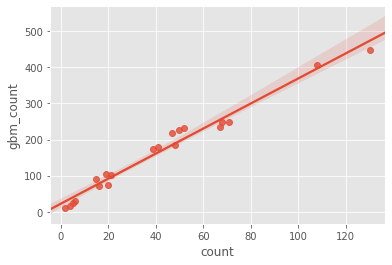

In [396]:
sns.regplot(x="count", y="gbm_count", data=gbm_bottom)

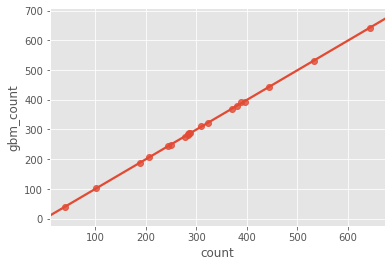

In [394]:
sns.regplot(x="count", y="gbm_count", data=gbm_top)

In [140]:
#train = train.drop(["count","xgb_count"],axis=1)

In [402]:
shap_values[gbm_bottom.index]

IndexError: index 8493 is out of bounds for axis 0 with size 912

In [397]:
# summarize the effects of all the features
shap.summary_plot(shap_values[gbm_bottom.index,:], vali.loc[gbm_bottom.index,:])

IndexError: index 8493 is out of bounds for axis 0 with size 912

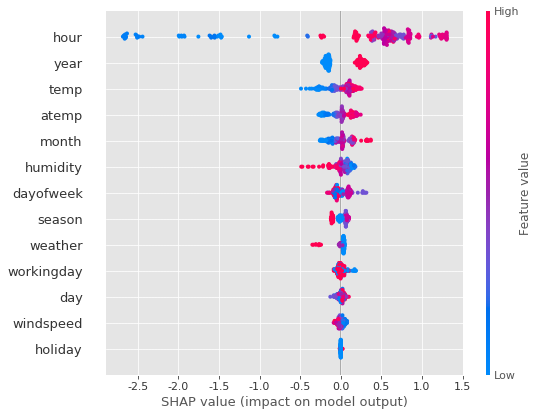

In [152]:
# summarize the effects of all the features
shap.summary_plot(shap_values[gbm_top.index,:], train.loc[gbm_top.index,:])

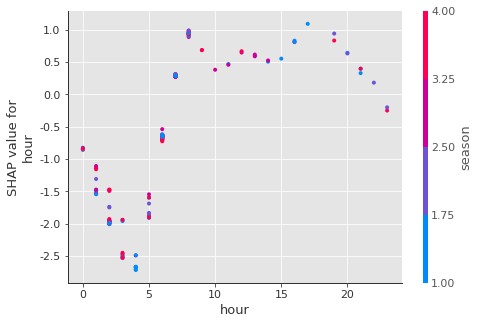

In [154]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("hour", shap_values[gbm_bottom.index,:], train.loc[gbm_bottom.index,:])

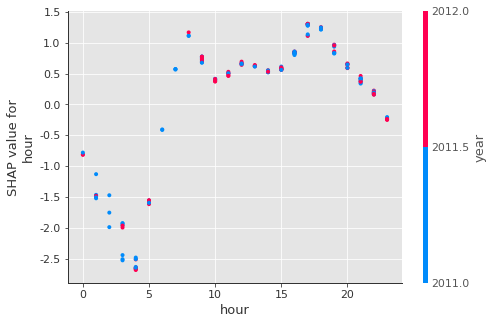

In [155]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("hour", shap_values[gbm_top.index,:], train.loc[gbm_top.index,:])

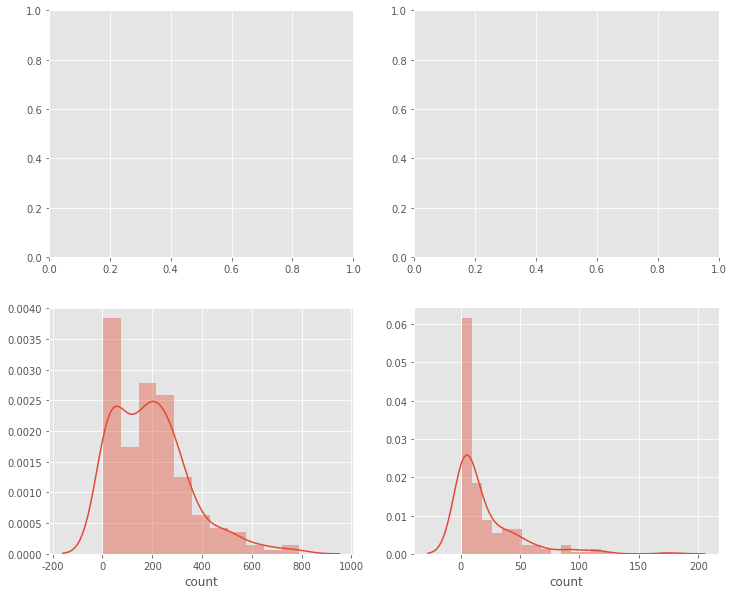

In [159]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)

sns.distplot(gbm_top["count"],ax=axes[1][0])
sns.distplot(gbm_bottom["count"],ax=axes[1][1])

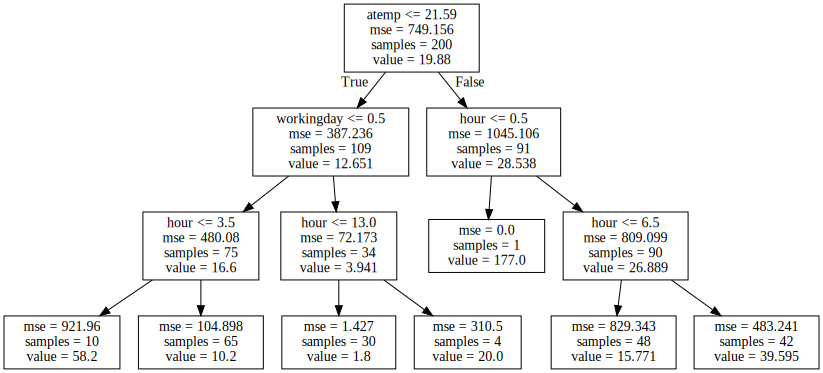

In [166]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source

#y=gbm_bottom["count"]
#drop_column = ["count","gbm_count","gbm_diff"]
#gbm_bottom = gbm_bottom.drop(drop_column,axis=1)

regr_11 = DecisionTreeRegressor(max_depth=3)
regr_11.fit(gbm_bottom,y)

Source(export_graphviz(regr_11, out_file = None, 
               feature_names = gbm_bottom.columns))

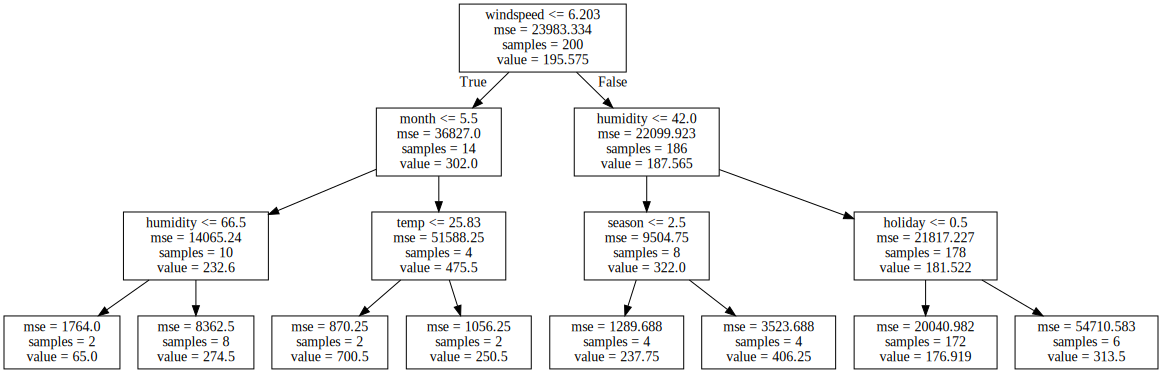

In [167]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source

y=gbm_top["count"]
drop_column = ["count","gbm_count","gbm_diff"]
gbm_top = gbm_top.drop(drop_column,axis=1)

regr_11 = DecisionTreeRegressor(max_depth=3)
regr_11.fit(gbm_bottom,y)

Source(export_graphviz(regr_11, out_file = None, 
               feature_names = gbm_bottom.columns))

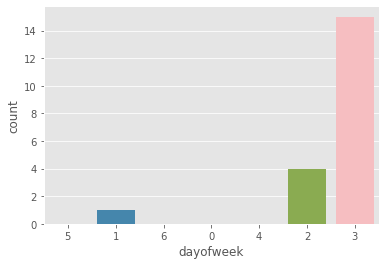

In [701]:
sns.countplot(data=gbm_bottom, x="dayofweek")

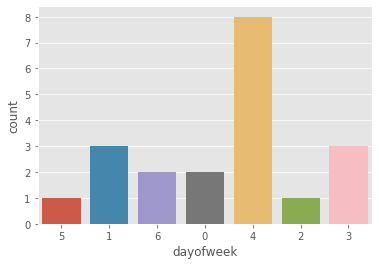

In [702]:
sns.countplot(data=gbm_top, x="dayofweek")

In [746]:
vali.loc[vali["dayofweek"]=="3"].index

Int64Index([8151, 8152, 8153, 8154, 8155, 8156, 8157, 8158, 8159, 8160,
            ...
            9053, 9054, 9055, 9056, 9057, 9058, 9059, 9060, 9061, 9062],
           dtype='int64', length=144)

In [750]:
vali.loc[vali["dayofweek"]=="3"].index

Int64Index([8151, 8152, 8153, 8154, 8155, 8156, 8157, 8158, 8159, 8160,
            ...
            9053, 9054, 9055, 9056, 9057, 9058, 9059, 9060, 9061, 9062],
           dtype='int64', length=144)

In [756]:
lgb_vali_pred

array([107.07447946,  87.33680817,  60.9600714 ,  36.34395767,
        15.84156313,  22.46580174,  73.49958238, 194.0577094 ,
       408.40674307, 405.08130457, 363.58455988, 424.32318164,
       455.0461322 , 449.89042596, 413.98650434, 427.44039131,
       572.83984178, 723.54058264, 657.46556803, 571.50014797,
       450.77477848, 358.21153308, 281.94504585, 122.89534247,
        73.87695307,  31.59299716,  16.83513462,  10.03353411,
        10.46508479,  34.11648918, 128.75295341, 330.88178538,
       540.6384378 , 386.9240806 , 264.67230297, 279.92582981,
       338.83137505, 302.92574658, 281.64950169, 319.78979888,
       424.6443571 , 655.40701818, 618.10032076, 466.03871517,
       348.82406198, 276.34276602, 198.41605313, 127.78206227,
        77.50417669,  33.08780675,  19.1806733 ,  10.58500186,
         9.94378879,  34.24621939, 118.35866825, 342.72346399,
       558.54054522, 365.27322557, 261.88506523, 264.05608935,
       322.2133941 , 297.75237261, 282.23118238, 270.38

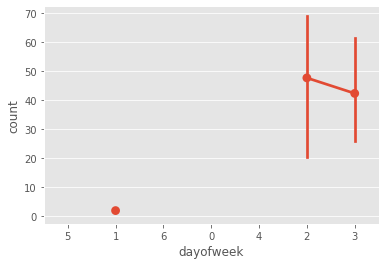

In [717]:
sns.pointplot(data=gbm_bottom, x="dayofweek", y="count")

In [522]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_params={'max_depth':range(1,14,1),'n_estimators':[1,10,100]}
grid_gb=GridSearchCV(gb,gb_params,scoring=rmsle_scorer,cv=5)
grid_gb.fit(train,yLabelslog)
preds3 = grid_gb.predict(test)
print('RMSLE Value for GradientBoosting {}'.format(rmsle(np.exp(yLabelslog_test),np.exp(preds3),False)))

RMSLE Value for GradientBoosting 0.3507116556599985


In [490]:
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
9063,3,0,0,1,30.34,34.090,62,7.00150,2012,9,1,0,2
9064,3,0,0,1,29.52,34.850,74,8.99810,2012,9,1,1,2
9065,3,0,0,1,28.70,32.575,70,11.00140,2012,9,1,2,2
9066,3,0,0,1,28.70,32.575,70,7.00150,2012,9,1,3,2
9067,3,0,0,1,28.70,32.575,70,8.20147,2012,9,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.00270,2012,12,19,19,6
10882,4,0,1,1,14.76,17.425,57,15.00130,2012,12,19,20,6
10883,4,0,1,1,13.94,15.910,61,15.00130,2012,12,19,21,6
10884,4,0,1,1,13.94,17.425,61,6.00320,2012,12,19,22,6


In [537]:
print((np.sqrt(mean_squared_log_error(preds3,yLabels_test))))

1.3306610954551883


In [538]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_params={'max_depth':range(1,15,1),'n_estimators':[1,10,100]}
grid_gb=GridSearchCV(gb,gb_params,scoring=rmsle_scorer,cv=7)
grid_gb.fit(train,yLabelslog)
preds3 = grid_gb.predict(test)
print('RMSLE Value for GradientBoosting {}'.format(rmsle(np.exp(yLabelslog_test),np.exp(preds3),False)))

RMSLE Value for GradientBoosting 0.35058487209908545


In [532]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression

#for random forest regresion.
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(train,yLabels)
pred=clf_rf.predict(test)
print((np.sqrt(mean_squared_log_error(pred,yLabels_test))))

0.36483653816456607


In [530]:
pred

array([156.394,  95.574,  62.77 , ..., 165.488, 136.614,  64.914])

In [292]:
preds3[yLabels_test.loc[yLabels_test<=5].index]

IndexError: index 9116 is out of bounds for axis 0 with size 1823

In [294]:
preds3

array([5.11574313, 4.81471615, 4.21627149, ..., 5.10173094, 4.88369753,
       4.37938547])

In [293]:
yLabels.loc[yLabels==5].index

Int64Index([  47,   69,  142,  166,  209,  258,  302,  328,  378,  479,
            ...
            8346, 8393, 8394, 8419, 8468, 8586, 8729, 8730, 8923, 8971],
           dtype='int64', length=144)

In [ ]:
print('RMSLE Value for GradientBoosting {}'.format(rmsle(np.exp(yLabelslog_test),np.exp(preds3),False)))

In [288]:
yLabels_test.loc[yLabels_test==5].index

Int64Index([ 9137,  9163,  9283,  9331,  9472,  9498,  9546,  9930,  9931,
             9954, 10052, 10263, 10265, 10289, 10314, 10338, 10408, 10434,
            10482, 10577, 10648, 10816, 10818, 10841, 10865],
           dtype='int64')